## Salary_hike -> Build a prediction model for Salary_hike

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [53]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\4_Simple Linear Regression\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

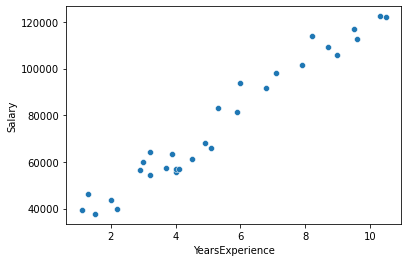

In [54]:
sns.scatterplot(x=data.YearsExperience, y=data.Salary)

In [55]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [56]:
x = np.array(data["YearsExperience"]).reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [57]:
y = np.array(data["Salary"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [59]:
print("Length of X_Train : ",len(x_train))
print("Length of Y_Train : ",len(y_train))
print("Length of X_Test : ",len(x_test))
print("Length of Y_Test : ",len(y_test))

Length of X_Train :  24
Length of Y_Train :  24
Length of X_Test :  6
Length of Y_Test :  6


In [60]:
x_test

array([[3.2],
       [4.1],
       [1.1],
       [3. ],
       [7.1],
       [3.2]])

In [61]:
y_test

array([[64445.],
       [57081.],
       [39343.],
       [60150.],
       [98273.],
       [54445.]])

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
model.score(x_test,y_test)

0.878066151804813

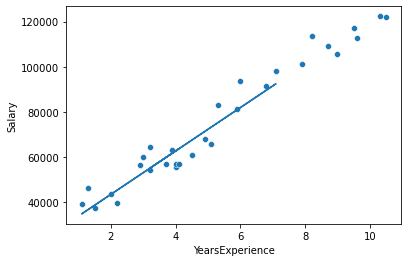

In [64]:
sns.scatterplot(x=data.YearsExperience, y=data.Salary)
plt.plot(x_test,model.predict(x_test))
plt.show()

In [65]:
model.coef_

array([[9599.82840894]])

In [66]:
model.intercept_

array([24352.35950373])

In [67]:
y_predict = np.round(model.predict(x_test),2)
y_predict[0:,0]

array([55071.81, 63711.66, 34912.17, 53151.84, 92511.14, 55071.81])

In [68]:
x_test[0:,0]

array([3.2, 4.1, 1.1, 3. , 7.1, 3.2])

In [69]:
y_test[0:,0]

array([64445., 57081., 39343., 60150., 98273., 54445.])

In [70]:
data_1 = {"Test_YearsExperience" : x_test[0:,0], "Actual_Salary" : y_test[0:,0], "Predicted_Salary" : y_predict[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\4_Simple Linear Regression\\Predicted_Salary_Data.csv") 
data_1.head()

,Test_YearsExperience,Actual_Salary,Predicted_Salary
0,3.2,64445.0,55071.81
1,4.1,57081.0,63711.66
2,1.1,39343.0,34912.17
3,3.0,60150.0,53151.84
4,7.1,98273.0,92511.14


In [71]:
import statsmodels.formula.api as smf

In [72]:
linear_model = smf.ols("y~x", data=data).fit()

In [73]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [74]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        15:59:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""